Phys474 - Spring 2022

Lab 2 - The Time Dependent Schrodinger Equation 

<font color='red'>Author: Owen Hallock

In this lab you will gain practice in calculating the TDSE for various potentials. In particular we will examine the scattering of a guassian wave packet from 
- Step Potential
- Barrier Potential

The Schrodinger equation is given by

$i\hbar\frac{\partial\Psi(x)}{\partial x} = \hat{H}\Psi(x)$ 

or,

$i\hbar\frac{\partial\Psi(x)}{\partial x} = -\frac{\hbar^2}{2m}\nabla^2\Psi(x)+V(x)\Psi(x)$ 

We implement this in 1D using the Hamiltonian as we did for the TISE

the QM Hamiltonian is given by

$\hat{H}=T+V=-\frac{\hbar^2}{2m}\nabla^2+V$

The Laplacian $\nabla^2$ in 1D is given by an $nxn$ matrix

$\nabla^2= \frac{\partial^2}{\partial x^2}=
\frac{1}{a^2}\begin{pmatrix}
-2& 1 & 0& 0&0&\ldots \\
1 &-2 & 1 &0 &0 &\ldots\\
0 & 1 & -2& 1 & 0 & \ldots \\
0 & 0 &1&-2&1&\ldots \\
\vdots&\vdots&\vdots&\vdots&\vdots&\ddots
\end{pmatrix}$

where we put the problem on a grid of $n$ points in $x$ with spacing $a$.


Then for the Hamiltonian we have

$\hat{H}=T+V=-\frac{\hbar^2}{2m}\nabla^2+V = \frac{-\hbar^2}{2ma^2}\begin{pmatrix}
-2& 1 & 0& 0&0&\ldots \\
1 &-2 & 1 &0 &0 &\ldots\\
0 & 1 & -2& 1 & 0 & \ldots \\
0 & 0 &1&-2&1&\ldots \\
\vdots&\vdots&\vdots&\vdots&\vdots&\ddots
\end{pmatrix}  + 
\begin{pmatrix}
V(x_1)& 0 & 0& 0&0&\ldots \\
0 &V(x_2) & 0 &0 &0 &\ldots\\
0 & 0 & V(x_3)& 0 & 0 & \ldots \\
0 & 0 &0&V(x_4)&0&\ldots \\
\vdots&\vdots&\vdots&\vdots&\vdots&\ddots
\end{pmatrix} 
$




___________________________________________________________________________________
Use the following unless instructed otherwise

- Use atomic units $\hbar =1$, use $m=m_e=1$
- use an array for $x$ with spacing $.01$ and $0\le x \le 50.$
- use an array for times with spacing $0.005$ and $0\le t \le 4$
- for the wave packet use $x_0=12.5$ and $\sigma_x=1.75$
- Make your plots and animations like the example from lecture on Lab 2 with $V(x)$, $\left<E\right>$ with band of $\pm 2\sigma_E$, $|\Psi(x)|^2$

+++++++++++++++++++++++++++++++++++++++++++<br>
For the Step Potential use

$V(x)=0$ for $0\le x\le 25$ <br>
$V(x)=40$ for $25\lt x\le 50 $<br>
+++++++++++++++++++++++++++++++++++++++++++

+++++++++++++++++++++++++++++++++++++++++++<br>
For the Barrier Potential use 

$V(x)=0$ for $0\le x\le 25$ <br>
$V(x)=40$ for $25\lt x\le 25+W$

where $W$ is the width in a.u. and will be <br>
given below for various cases<br>
+++++++++++++++++++++++++++++++++++++++++++



In [1]:
from scipy import integrate
from scipy import sparse

import matplotlib.pyplot as plt
from matplotlib import animation

import numpy as np

%matplotlib notebook

hbar =1
m=1
stepsx=5000
stepst=800

dx=.005
x=np.arange(0,50,.01)

time=np.arange(0,4,dx)

x0=12.5
sigmaX=1.75

def packet(x,k0,sigX):
    x0=12.5
    A=1/(sigX*np.sqrt(np.pi))
    psi=np.sqrt(A)*np.exp(-(x-x0)**2/(2*sigX**2))*np.exp(1j*k0*x)
    return psi


________________________________________________________________________________
Part 1

We will start by examining some properties of gaussian wave packets, which are very often used
as a way to represent a "particle" of mean wavenumber $k_0$. 

A Gaussian wave packet properly normalized such that 

$\int_{-\infty}^{\infty} \left|\Psi(x)\right|^2  dx =1 $

is given by

$\Psi(x) = \frac{1}{\sqrt{\sigma_x\sqrt{\pi}}}e^{-\frac{(x-x_0)^2}{2\sigma_x^2}}e^{ik_0x}$

where $x_0$ is the central position, $\sigma_x$ is the "spatial width" and $k_0$
is the mean wave number (i.e move to the right with mean $k_0$.

- make a single plot with 2 subplots top: the $Re(\Psi(x))$, $Im(\Psi(x))$ and $|\Psi(x)|$ for $k_0=5$ and $\sigma_x=1.75$, bottom:  the Fourier Transform from $x$ space to $k$ space $|f(k)|=|FFT(\Psi(x))|$
- make a single plot with 2 subplots top: the $Re(\Psi(x))$, $Im(\Psi(x))$ and $|\Psi(x)|$ for $k_0=5$ and $\sigma_x=.5$, bottom:  the Fourier Transform from $x$ space to $k$ space $|f(k)|=|FFT(\Psi(x))|$
- make a single plot with 2 subplots top: the $Re(\Psi(x))$, $Im(\Psi(x))$ and $|\Psi(x)|$ for $k_0=9$ and $\sigma_x=1.75$, bottom:  the Fourier Transform from $x$ space to $k$ space $|f(k)|=|FFT(\Psi(x))|$

Note: when you do the fft on $\Psi(x)$ you are transforming to $1/x$ space to represent the result as $f(k)$ vs $k$ you have to multiply the $1/x$=axis number by $2\pi$ to get it in $k$ space
___________________________________________________________________________________

<IPython.core.display.Javascript object>


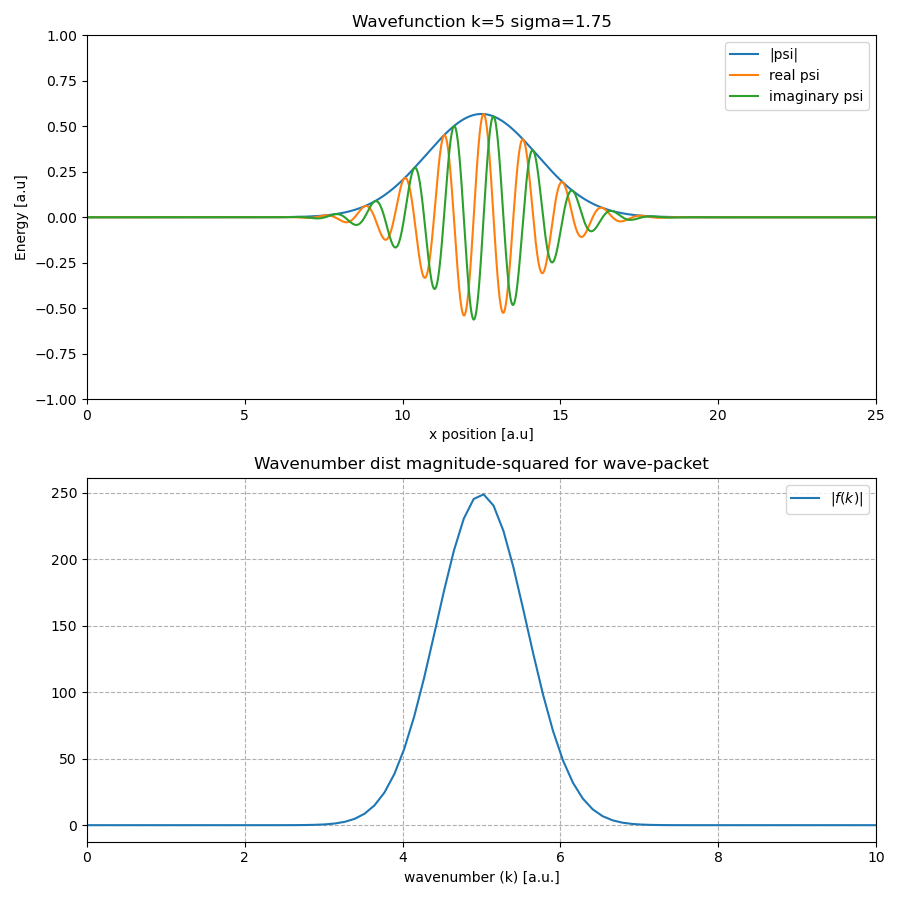

<IPython.core.display.Javascript object>


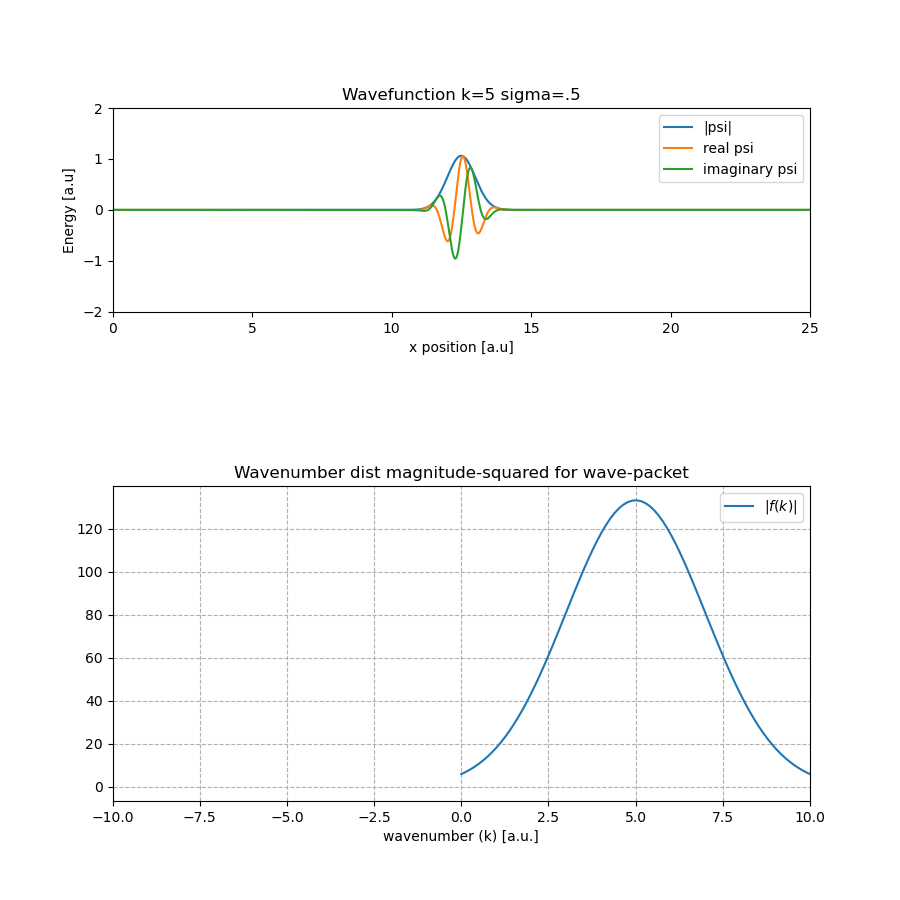

C:\Users\owenh\AppData\Local\Temp/ipykernel_26572/1082264461.py:64: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  fig.tight_layout()


<IPython.core.display.Javascript object>


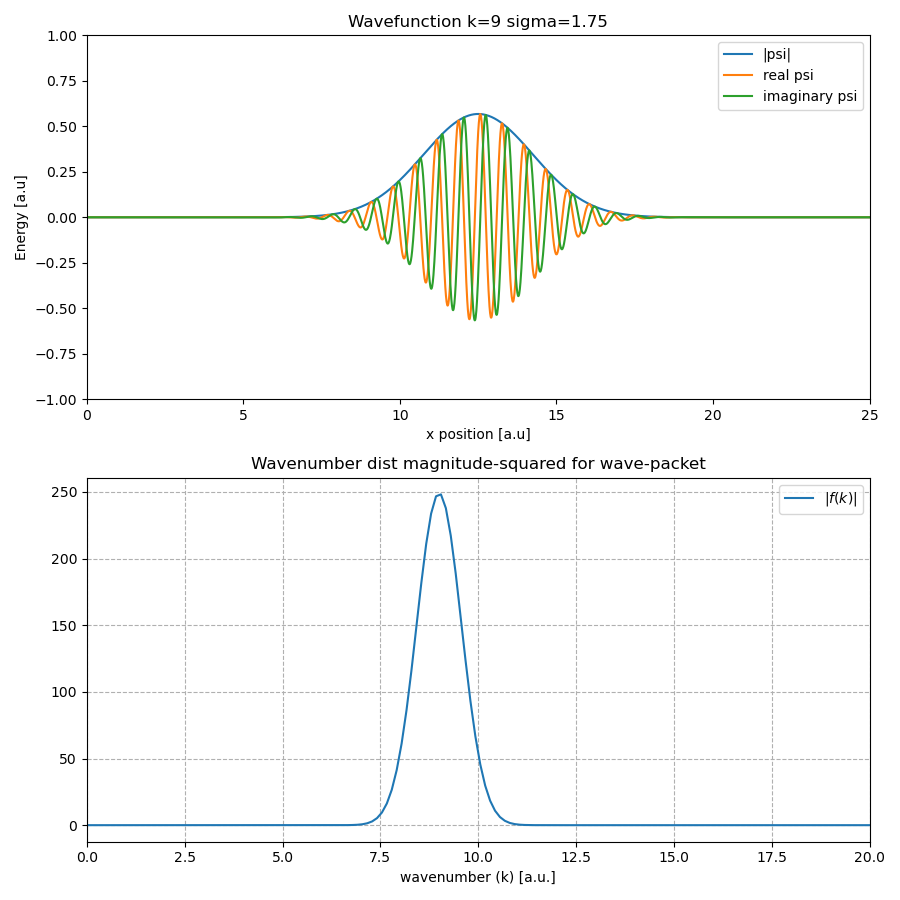

In [2]:
#f_k=np.fft.fft(psi) array for y
#k=np.fft.fftfrequency(psi.size,dy)*2pi array for x
psi=packet(x,5,1.75)

f_k=np.fft.fft(psi)
n=np.int_(psi.size)
k=np.fft.fftfreq(n,d=.01)*2*np.pi

fig = plt.figure(figsize=(9,9))
ax = plt.subplot(2,1,1)

ax.set_xlim(0,25)
ax.set_ylim(-1,1)
ax.plot(x,np.abs(psi), label='|psi|')
ax.plot(x,np.real(psi),label='real psi')
ax.plot(x,np.imag(psi),label='imaginary psi')
ax.set_xlabel('x position [a.u]')
ax.set_ylabel('Energy [a.u]')
ax.set_title('Wavefunction k=5 sigma=1.75')
ax.legend()

ax = plt.subplot(2,1,2) #plot the |f(k)| = fft(psi)
n2 = np.int_(f_k.size/2) #plot only positive frequencies
ax.set_xlim(0,10)
ax.plot(k[:n2],np.abs(f_k[:n2]),label=r'$|f(k)|$') #plot |f(k)|^2
ax.grid(linestyle='--')
ax.set_xlabel('wavenumber (k) [a.u.]')
ax.legend(loc=1)
ax.set_title('Wavenumber dist magnitude-squared for wave-packet')

fig.tight_layout()
plt.show()


psi2=packet(x,5,.5)

f_k=np.fft.fft(psi2)

k=np.fft.fftfreq(psi2.size,d=.01)*2*np.pi

fig = plt.figure(figsize=(9,9))
ax = plt.subplot(3,1,1)

ax.set_xlim(0,25)
ax.set_ylim(-2,2)
ax.plot(x,np.abs(psi2),label='|psi|')
ax.plot(x,np.real(psi2),label='real psi')
ax.plot(x,np.imag(psi2),label='imaginary psi')
ax.legend()
ax.set_xlabel('x position [a.u]')
ax.set_ylabel('Energy [a.u]')
ax.set_title('Wavefunction k=5 sigma=.5')

ax = plt.subplot(2,1,2) #plot the |f(k)| = fft(psi)
n2 = np.int_(f_k.size/2) #plot only positive frequencies
ax.set_xlim(-10,10)
ax.plot(k[:n2],np.abs(f_k[:n2]),label=r'$|f(k)|$') #plot |f(k)|^2
ax.grid(linestyle='--')
ax.set_xlabel('wavenumber (k) [a.u.]')
ax.legend(loc=1)
ax.set_title('Wavenumber dist magnitude-squared for wave-packet')


fig.tight_layout()
plt.show()

psi=packet(x,9,1.75)

f_k=np.fft.fft(psi)

k=np.fft.fftfreq(psi.size,d=.01)*2*np.pi

fig = plt.figure(figsize=(9,9))
ax = plt.subplot(2,1,1)

ax.set_xlim(0,25)
ax.set_ylim(-1,1)

ax.plot(x,np.abs(psi), label='|psi|')
ax.plot(x,np.real(psi),label='real psi')
ax.plot(x,np.imag(psi),label='imaginary psi')
ax.legend()
ax.set_xlabel('x position [a.u]')
ax.set_ylabel('Energy [a.u]')
ax.set_title('Wavefunction k=9 sigma=1.75')

ax = plt.subplot(2,1,2) #plot the |f(k)| = fft(psi)
n2 = np.int_(f_k.size/2) #plot only positive frequencies
ax.set_xlim(0,20)
ax.plot(k[:n2],np.abs(f_k[:n2]),label=r'$|f(k)|$') #plot |f(k)|^2
ax.grid(linestyle='--')
ax.set_xlabel('wavenumber (k) [a.u.]')
ax.legend(loc=1)
ax.set_title('Wavenumber dist magnitude-squared for wave-packet')


fig.tight_layout()
plt.show()

_____________________________________________________________________________________
Part 2:

In this part we will make a plot with for the two potentials and various initial conditions

a) Step Potential
- $k_0=7$
- $k_0=9$
- $k_0=10$

b) Barrier Potential $W=.25$
- $k_0=7$
- $k_0=9$
- $k_0=10$

c) Barrier Potential $W=1$
- $k_0=7$
- $k_0=9$
- $k_0=10$


____________________________________________________________________________________

<IPython.core.display.Javascript object>


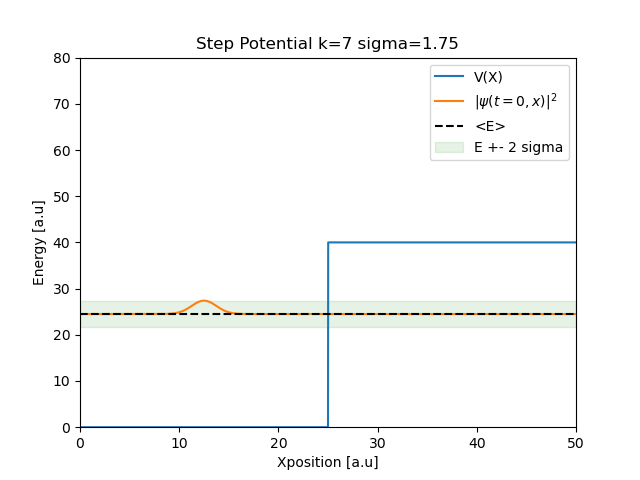

<IPython.core.display.Javascript object>


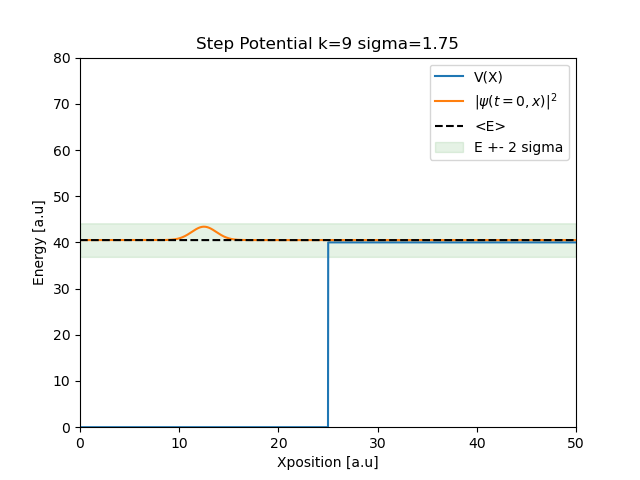

<IPython.core.display.Javascript object>


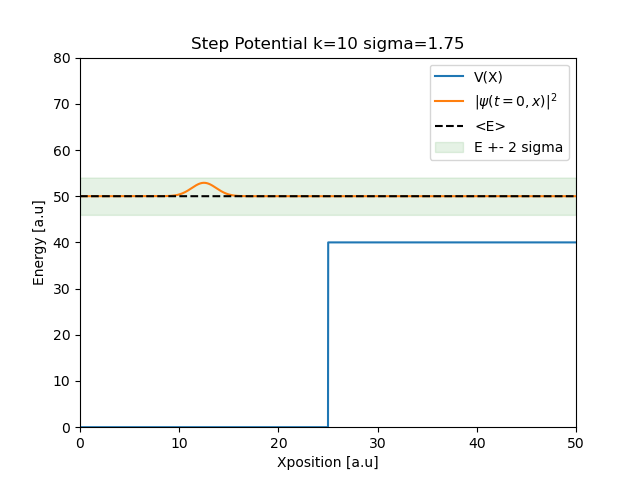

0


<IPython.core.display.Javascript object>


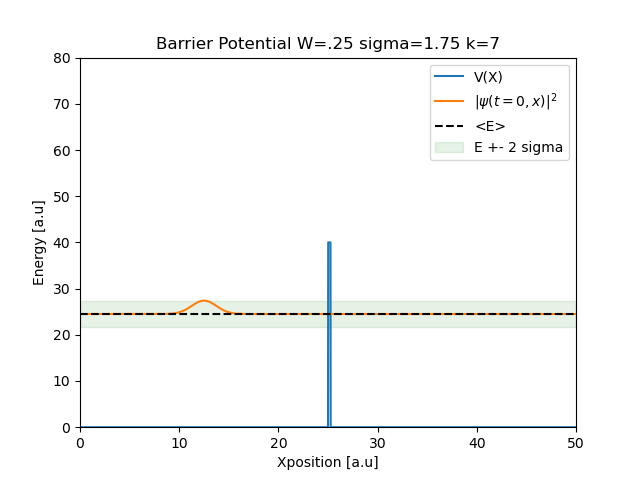

1


<IPython.core.display.Javascript object>


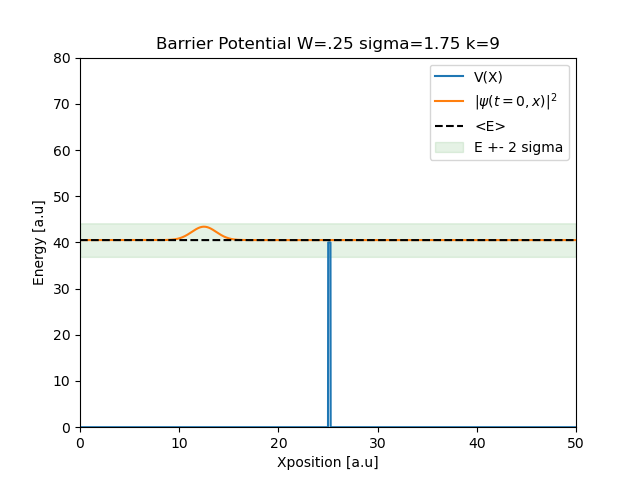

2


<IPython.core.display.Javascript object>


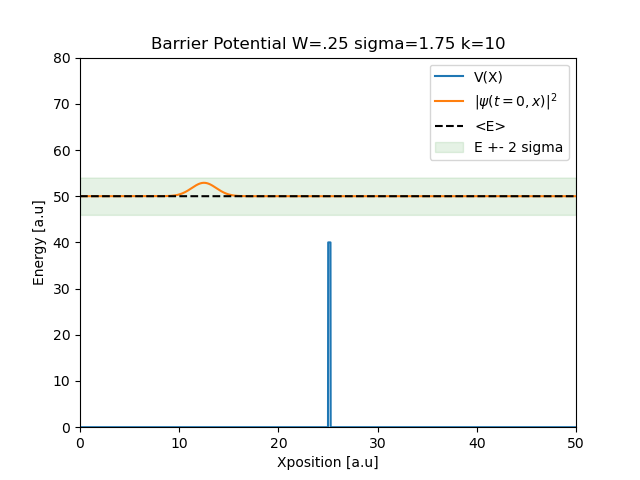

0


<IPython.core.display.Javascript object>


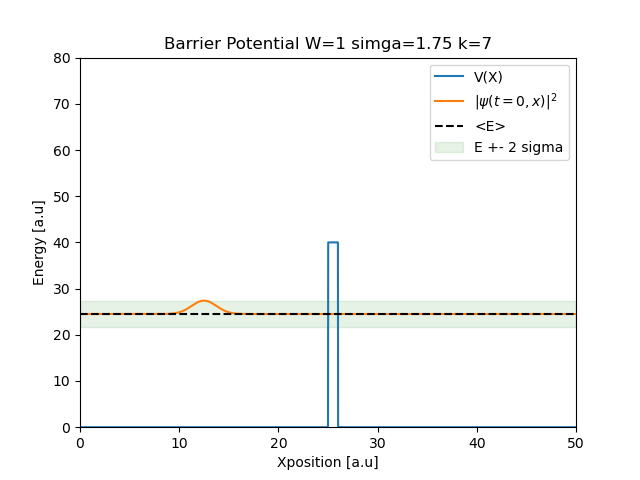

1


<IPython.core.display.Javascript object>


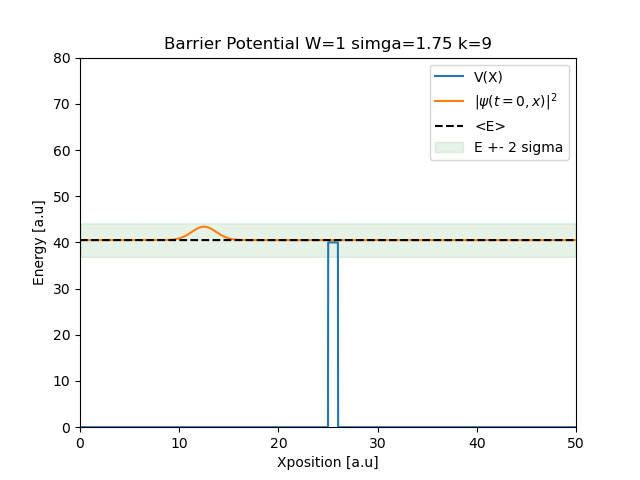

2


<IPython.core.display.Javascript object>


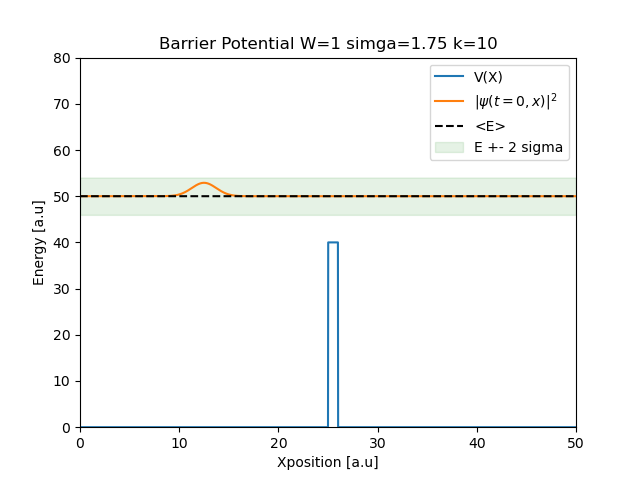

In [4]:
"""
make plots for part 2


"""

import scipy.linalg as la

x=np.arange(0,50,.01)

A=1/(1.75*np.sqrt(np.pi))

time=np.arange(0,4,.005)

hbar = 1
m = 1



v0=40

sigX=1.75/np.sqrt(2)
kxSig=hbar/(2*sigX)
eSig=hbar**2*k*kxSig

Width = 50

# create x-vector from -W to W
# get step size
h=x[1]-x[0]
potential1=[]
for i in x:
    if abs(i) <= Width/2:
        potential1.append(0)
    if abs(i) > Width/2:
        potential1.append(v0)

potential1=np.array(potential1)
k=7

eSig=hbar**2*k*kxSig


psi=packet(x,k,1.75)

E1 =(k**2)/2 
eUp=E1+eSig
eDown=E1-eSig

E=[]
for i in x:
    E.append(E1)

psi=psi*3
plt.figure()
plt.xlim(0,Width)
plt.ylim(0,80)
plt.plot(x, potential1,label='V(X)')
plt.plot(x,np.abs(psi)**2+E,label=r"$\vert\psi(t=0,x)\vert^2$")
plt.plot(x,E,linestyle='--',color="black",label='<E> ' + str(E))
plt.fill_between(x,eDown,eUp, color='green', alpha=.1, label= 'E +- 2 sigma')
plt.legend((['V(X)', r"$\vert\psi(t=0,x)\vert^2$", '<E>', 'E +- 2 sigma']), loc='upper right')
plt.title('Step Potential k=7 sigma=1.75')
plt.ylabel("Energy [a.u]")
plt.xlabel("Xposition [a.u]")

k=9


psi=packet(x,k,1.75)

E1 =(k**2)/2 
E=[]
for i in x:
    E.append(E1)

eSig=hbar**2*k*kxSig
eUp=E1+eSig
eDown=E1-eSig

psi=psi*3
plt.figure()
plt.xlim(0,Width)
plt.ylim(0,80)
plt.plot(x, potential1,label='V(X)')
plt.plot(x,np.abs(psi)**2+E,label=r"$\vert\psi(t=0,x)\vert^2$")
plt.plot(x,E,linestyle='--',color="black",label='<E> ' + str(E))
plt.fill_between(x,eDown,eUp, color='green', alpha=.1, label= 'E +- 2 sigma')
plt.legend((['V(X)', r"$\vert\psi(t=0,x)\vert^2$", '<E>', 'E +- 2 sigma']), loc='upper right')
plt.title('Step Potential k=9 sigma=1.75')
plt.ylabel("Energy [a.u]")
plt.xlabel("Xposition [a.u]")

k=10

psi=packet(x,k,1.75)

E1 =(k**2)/2 
E=[]
for i in x:
    E.append(E1)

eSig=hbar**2*k*kxSig
eUp=E1+eSig
eDown=E1-eSig

psi=psi*3
plt.figure()
plt.xlim(0,Width)
plt.ylim(0,80)
plt.plot(x, potential1,label='V(X)')
plt.plot(x,np.abs(psi)**2+E,label=r"$\vert\psi(t=0,x)\vert^2$")
plt.plot(x,E,linestyle='--',color="black",label='<E> ' + str(E))
plt.fill_between(x,eDown,eUp, color='green', alpha=.1, label= 'E +- 2 sigma')
plt.legend((['V(X)', r"$\vert\psi(t=0,x)\vert^2$", '<E>', 'E +- 2 sigma']), loc='upper right')
plt.title('Step Potential k=10 sigma=1.75')
plt.ylabel("Energy [a.u]")
plt.xlabel("Xposition [a.u]")


#Barrier Potential W=.25


#𝑉(𝑥)=0 for 0≤𝑥≤25
#𝑉(𝑥)=40 for  25<𝑥≤25+𝑊
W=.25

potential2=[]
for i in x:
    if abs(i) <= Width/2 or abs(i) >W+Width/2:
        potential2.append(0)
    if abs(i) > Width/2 and abs(i)<= W + Width/2:
        potential2.append(v0)

for i in range(3):
    if i == 0:
        k=7
    if i == 1:
        k=9
    if i == 2:
        k=10
    
    print(i)
    psi=packet(x,k,1.75)

    E1 =(k**2)/2 
    E=[]
    for i in x:
        E.append(E1)
    
    eSig=hbar**2*k*kxSig
    eUp=E1+eSig
    eDown=E1-eSig

    psi=psi*3
    plt.figure()
    plt.xlim(0,Width)
    plt.ylim(0,80)
    plt.plot(x, potential2,label='V(X)')
    plt.plot(x,np.abs(psi)**2+E,label=r"$\vert\psi(t=0,x)\vert^2$")
    plt.plot(x,E,linestyle='--',color="black",label='<E> ' + str(E))
    plt.fill_between(x,eDown,eUp, color='green', alpha=.1, label= 'E +- 2 sigma')
    plt.title("Barrier Potential W=.25 sigma=1.75 k=" +str(k))
    plt.ylabel("Energy [a.u]")
    plt.xlabel("Xposition [a.u]")
    plt.legend((['V(X)', r"$\vert\psi(t=0,x)\vert^2$", '<E>', 'E +- 2 sigma']), loc='upper right')
#Barrier Potential W=1

W=1

potential3=[]
for i in x:
    if abs(i) <= Width/2 or abs(i) >W+Width/2:
        potential3.append(0)
    if abs(i) > Width/2 and abs(i)<= W + Width/2:
        potential3.append(v0)

for i in range(3):
    if i == 0:
        k=7
    if i == 1:
        k=9
    if i == 2:
        k=10
    
    print(i)
    psi=packet(x,k,1.75)

    E1 =(k**2)/2 
    E=[]
    for i in x:
        E.append(E1)
    
    eSig=hbar**2*k*kxSig
    eUp=E1+eSig
    eDown=E1-eSig
    
    psi=psi*3
    plt.figure()
    plt.xlim(0,Width)
    plt.ylim(0,80)
    plt.plot(x, potential3,label='V(X)')
    plt.plot(x,np.abs(psi)**2+E,label=r"$\vert\psi(t=0,x)\vert^2$")
    plt.plot(x,E,linestyle='--',color="black",label='<E> ' + str(E))
    plt.fill_between(x,eDown,eUp, color='green', alpha=.1, label= 'E +- 2 sigma')
    plt.title("Barrier Potential W=1 simga=1.75 k=" +str(k))
    plt.ylabel("Energy [a.u]")
    plt.xlabel("Xposition [a.u]")
    plt.legend((['V(X)', r"$\vert\psi(t=0,x)\vert^2$", '<E>', 'E +- 2 sigma']), loc='upper right')
    

__________________________________________________________________________________________
Part 3

- write the code to solve the TDSE to get the wave-function vs t given any of the conditions above. 
- make an animation of the wave-function based on the solution
- try it on one or more of the cases above




In [ ]:
# Your code here...

x0=12.5
sigmaX=1.75
k0=3
m=1
potential2=np.array(potential2)
potential3=np.array(potential3)
A = 1.0 / (sigmaX * np.sqrt(np.pi)) # normalization constant


E1 =(k0**2)/2 
E=[]
for i in x:
    E.append(E1)

# Initial Wavefunction wave packet moving to right 
psi0=np.sqrt(A)*np.exp(-((x-x0)**2)/(2*sigmaX**2))*np.exp(1j*k0*x)


# Laplace Operator (Finite Difference)
D2 = sparse.diags([1, -2, 1], [-1, 0, 1], shape=(x.size, x.size)) / dx**2

# RHS of Schrodinger Equation
hbar = 1 #[a.u.]
# hbar = 1.0545718176461565e-34  #[si units]

def psi_t(t, psi):
    dpsi_dt = -1j * (- 0.5 * hbar / m * D2.dot(psi) + potential1 / hbar * psi)
    return dpsi_dt

dt = 0.005  # time interval for snapshots
t0 = 0.0    # initial time
tf = 3    # final time
t_eval=np.arange(t0,tf,dt)  # recorded time shots

sol = integrate.solve_ivp(psi_t, t_span = [0, tf], y0 = psi0, t_eval = t_eval, method="RK23")
print(np.shape(sol.y))

fig = plt.figure(figsize=(6,6))
ax1 = plt.subplot(1,1,1)
ax1.set_xlim(0, 50)
ax1.set_ylim(0, 60)
ax1.set_xlabel('Position [a.u.]',fontsize=15)
ax1.set_ylabel(r'$|\psi(x)|^2$',fontsize=15)
title = ax1.set_title('')
line1, = ax1.plot([], [],label=r"$V(x)/500$ ")
line2, = ax1.plot([], [], label=r"$\vert\psi(t,x)\vert^2$")
plt.legend(loc='upper right')


step = np.int_(np.size(x)/2)

def init():
    line1.set_data(x, potential1)
    line2.set_data([],[])
    return line1,line2,


def animate(i):
    line2.set_data(x, np.abs(sol.y[:,i]/A)**2+E)
    integral = np.sum(np.abs(sol.y[:,i])**2)*dx
    integralR = np.sum(np.abs(sol.y[step:,i])**2)*dx
    integralL= np.sum(np.abs(sol.y[:step,i])**2)*dx
    #title.set_text('Time = {0:1.3f}'.format(sol.t[i]))
    title.set_text(r'Time = {:1.3f} $PL$ = {:1.5f} $PR$ = {:1.5f}'.format(sol.t[i],integralL/.5, integralR/.5))
    return line2,


anim = animation.FuncAnimation(fig, animate, init_func=init,
                                frames=len(sol.t),interval=30, blit=True)

plt.show()

Part 4a

- for case 2a) above run your script for the 3 $k_0$ and see what is happening
- calcuate the 'transmission' and 'reflection' for each


In [9]:
# run code above for part 3 with these cases and note results

#This simulation had the smallest amount of wave transmitted and the largest amount reflected. Also it had the most distortion when hitting barrier

#By integrating the wave packet in the areas before and after the wave and comparing the two values we were able to determine 
#The percentage of the wave that was reflected and transmitted. This is shown in the animation by PL and PR. 
#PR represents the probability of the wave function on the right side of the wave and Pl is the same but for the left side of the wave
#By comparing these values after the wavepacket collides with the step we saw that 99.993% of the wave packet was reflected leaving only .007% of the packet transmitted through the barrier

_______________________________________________________________________
Observations



________________________________________________________________________

Part 4b

- for case 2b) above run your script for the 3 $k_0$ and see what is happening
- calcuate the 'transmission' and 'reflection' for each



In [10]:
# run code above for part 3 with these cases and note results

#This simulation had the most of the wave transmitted compared to the other 2 simulations due to the width of the barrier being so thin

#By using the same method mentioned in part 4a and comparing these values after the wavepacket collides with the barriar we saw that 53% of the wavepacket was transmitted and 47% was reflected

_______________________________________________________________________
Observations



________________________________________________________________________

Part 4c

- for case 2c) above run your script for the 3 $k_0$ and see what is happening
- calcuate the 'transmission' and 'reflection' for each




In [11]:
# run code above for part 3 with these cases and note results

#By comparing these values after the wavepacket collides with the step we saw that 99.247% of the wave packet was reflected leaving only .753% of the packet transmitted through the barrier

_______________________________________________________________________
Observations



________________________________________________________________________

In [ ]:
#One of the main observations seen in this lab was how the widht of the barrier affected the transmitted and reflected values of the wave, with the thicker barriers reflecting more and transmitting less
#Also we were able to see how the interaction with the barrier caused the wave to deform after impact. In many cases it caused the wavepacket to stretch out.